<a href="https://colab.research.google.com/github/crown3633/crown3633.github.io/blob/master/AIXDL_Gate2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('content')

Drive already mounted at content; to attempt to forcibly remount, call drive.mount("content", force_remount=True).


In [ ]:
from keras.applications.vgg16 import VGG16
vgg16 = VGG16(weights='imagenet')
vgg16.save('vgg16.h5')
vgg16.save_weights('vgg16_wegiths.h5')

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# ### data2 - whole cars vs. all damaged cars

# In[1]:


import urllib
from IPython.display import Image, display, clear_output
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display, clear_output
# get_ipython().run_line_magic('matplotlib', 'inline')

import json
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('whitegrid')


# In[2]:


import os
import h5py
import numpy as np
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from keras.regularizers import l2, activity_l2, l1, activity_l1
from keras.regularizers import l2,l1
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History




In [ ]:
# In[3]:
root_dir = "content/MyDrive/DeepLearningProject/"
# def load_vgg16(weights_path='../vgg16_weights.h5'):
def load_vgg16(weights_path='./vgg16_weights.h5'):
    model = Sequential()
    # model.add(ZeroPadding2D((1,1),input_shape=(3, img_width, img_height)))
    # 아마 밑에 코드가 맞는 듯?
    model.add(ZeroPadding2D((1,1),input_shape = (img_width, img_height,3)))
    #padding = 'same' 옵션은 padding을 추가하여 input과 output의 크기를 똑같이 만드는 것. 
    #padding = 'valid' 옵션은 filter에 의해 output의 크기가 줄어들도록 만드는 것. 즉, padding을 하지 않는 것
    model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
    #Conv2D(output 개수, fileter size, strides), 일반적으로 출력 데이터의 size는 (N-F)/stride+1임. 이 때 N은 input image의 size, F는 filter size.
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), padding = 'same',activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), padding = 'same',activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), padding = 'same',activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), padding = 'same',activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), padding = 'same',activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), padding = 'same',activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), padding = 'same',activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), padding = 'same',activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), padding = 'same',activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), padding = 'same',activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), padding = 'same',activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), padding = 'same',activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
        # f = h5py.File(weights_path)
    # print("f.attrs.keys() : ",f.attrs.keys())
    # print("f.attrs['layer_names'] : ",f.attrs['layer_names'])
    # print("f.attrs['backend'] : ",f.attrs['backend'])
    # print("f.attrs['keras_version']",f.attrs['keras_version'])
    # assert os.path.exists(weights_path), 'Model weights not found (see "weights_path")'
    
    # vgg16 = VGG16(weights='imagenet')
    # print(len(model))
    model.layers[1].set_weights(vgg16.layers[1].get_weights())
    model.layers[3].set_weights(vgg16.layers[2].get_weights())
    model.layers[6].set_weights(vgg16.layers[4].get_weights())
    model.layers[8].set_weights(vgg16.layers[5].get_weights())
    model.layers[11].set_weights(vgg16.layers[7].get_weights())
    model.layers[13].set_weights(vgg16.layers[8].get_weights())
    model.layers[15].set_weights(vgg16.layers[9].get_weights())
    model.layers[18].set_weights(vgg16.layers[11].get_weights())
    model.layers[20].set_weights(vgg16.layers[12].get_weights())
    model.layers[22].set_weights(vgg16.layers[13].get_weights())
    model.layers[25].set_weights(vgg16.layers[15].get_weights())
    model.layers[27].set_weights(vgg16.layers[16].get_weights())
    model.layers[29].set_weights(vgg16.layers[17].get_weights())
    # model.layers[1].set_weights()


    # if weights_path:
    # # # note: this chops off the last layers of VGG16 

    # # # loads the weights of the VGG16 networks
    # # # note: when there is a complete match between model definition
    # # # and your weights savefile, you can simply call model.load_weights(filename)
    #     f = h5py.File(weights_path)
    #     print("model.layers[0] : ",model.layers[0])
    #     print("model.layers[1] : ",model.layers[1])
    #     print("model.layers : ",len(model.layers))
        # weights = 
        # model.layers[1].set_weights()
    #     for k in range(f.attrs['nb_layers']):
    #         if k >= len(model.layers): 
    #             # we don't look at the last (fully-connected) layers in the savefile
    #             break
    #         g = f['layer_{}'.format(k)]
    #         weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    #         model.layers[k].set_weights(weights)
    #     f.close()
    #     print("VGG16 Model with partial weights loaded.")
    # else:
    #     print("VGG16 Model with no weights Loaded.")


    return model


# In[4]:




In [ ]:
# do not rerun!!
# save_bottleneck_features(location)

In [ ]:
def save_bottleneck_features(location):
    datagen = ImageDataGenerator(rescale=1./255)  
    
    model = load_vgg16()
    batch_size = 16
    generator = datagen.flow_from_directory(train_data_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=batch_size,
                                            class_mode=None,
                                            shuffle=False) 
    # print("generator : ",generator.keys())
    # print("len(generator) : ",len(generator)) image data 개수 / batch_size
    steps_tr = nb_train_samples / batch_size
    bottleneck_features_train = model.predict(generator, steps_tr)
    print("nb_train_samples : ",nb_train_samples)
    print("bottleneck_features_train : ",len(bottleneck_features_train))
    np.save(open(location+"/bottleneck_features_train.npy", 'wb'), bottleneck_features_train)
    # print("bottleneck_features_train : ",len(bottleneck_features_train)) bottleneck_features_train이 9480개
    # repeat with the validation data
    steps_val = nb_validation_samples / batch_size

    generator = datagen.flow_from_directory(validation_data_dir,
                                            target_size=(img_width, img_height),
                                            batch_size = batch_size, #batch_size
                                            class_mode=None,
                                            shuffle=False)
    bottleneck_features_validation = model.predict(generator, steps_val)
    np.save(open(location+"/bottleneck_features_validation.npy", 'wb'), bottleneck_features_validation)


# In[5]:


def plot_metrics(hist, stop=50):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
                            
    axes = axes.flatten()

    axes[0].plot(range(stop), hist['accuracy'], label='Training', color='#FF533D')
    axes[0].plot(range(stop), hist['val_accuracy'], label='Validation', color='#03507E')
    axes[0].set_title('Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc='lower right')
                             
    axes[1].plot(range(stop), hist['loss'], label='Training', color='#FF533D')
    axes[1].plot(range(stop), hist['val_loss'], label='Validation', color='#03507E')
    axes[1].set_title('Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(loc='upper right')
                             
    plt.tight_layout();
    
    print("Best Model:") 
    print_best_model_results(hist)


# In[6]:


def train_binary_model():

    train_data = np.load(open(location+"/bottleneck_features_train.npy",'rb'))
    print(train_data.shape)
    print(type(train_samples))
    print("train_samples : ",train_samples)
    print("train_samples[0] : ", train_samples[0])
    print("train_samples[1] : ", train_samples[1])
    # print("train_samples[2] : ", train_samples[2])
    train_labels = np.array([0] * train_samples[0] + 
                            [1] * train_samples[1])

    print("validation_samples[0] : ", validation_samples[0])
    print("validation_samples[1] : ", validation_samples[1])
    print("train_data : ", len(train_data))


    validation_data = np.load(open(location+"/bottleneck_features_validation.npy",'rb'))
    validation_labels = np.array([0] * validation_samples[0] + 
                                 [1] * validation_samples[1])
    batch_size = 16
    
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:])) # 512, 4, 4
    print(model.summary())
    model.add(Dense(256, activation = 'relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5)) 
    model.add(Dense(1, activation = 'sigmoid')) # should activation be sigmoid for binary problem?

    model.compile(optimizers.SGD(lr=0.0001, momentum=0.9),
              loss='binary_crossentropy', metrics=['accuracy'])

    
    checkpoint = ModelCheckpoint(top_model_weights_path, monitor='val_acc', 
                                 verbose=1, save_best_only=True, save_weights_only=True, mode='auto')

    fit = model.fit(train_data, train_labels,
                    epochs = nb_epoch, batch_size = batch_size,
                    validation_data = (validation_data, validation_labels),
                    callbacks=[checkpoint])
              # epochs=nb_epoch, batch_size=16,
              # validation_data=(validation_data, validation_labels),
              # callbacks=[checkpoint])

    with open(location+'/top_history.txt', 'w') as f:
        json.dump(fit.history, f)
    
    return model, fit.history


# In[7]:


def finetune_binary_model():
    model = load_vgg16()

    # build a classifier model to put on top of the convolutional model
    top_model = Sequential()
    top_model.add(Flatten(input_shape=model.output_shape[1:]))
    top_model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(1, activation='sigmoid'))

    top_model.load_weights(top_model_weights_path) # load weights_path

    # add the model on top of the convolutional base
    model.add(top_model)
    
    # set the first 25 layers (up to the last conv block)
    # to non-trainable - weights will not be updated
    for layer in model.layers[:25]:
        layer.trainable=False

    # compile the model with a SGD/momentum optimizer 
    # and a very slow learning rate
    model.compile(loss='binary_crossentropy',
                 optimizer = optimizers.SGD(lr=0.00001, momentum=0.9), # reduced learning rate by 1/10
                  metrics=['accuracy'])
    
    # prepare data augmentation configuration
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    test_datagen = ImageDataGenerator(rescale=1./255)
    batch_size = 8
    train_generator= train_datagen.flow_from_directory(train_data_dir,
                                                     target_size=(img_height, img_width),
                                                     batch_size=batch_size,
                                                     class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                            target_size=(img_height, img_width),
                                                            batch_size = batch_size,
                                                            class_mode='binary')
    
    
    checkpoint = ModelCheckpoint(fine_tuned_model_path, monitor='val_acc', 
                                 verbose=1, save_best_only=True, 
                                 save_weights_only=False, mode='auto')
    
    steps_tr = nb_train_samples / batch_size
    steps_val = nb_validation_samples / batch_size
    # fine-tune the model
    fit = model.fit_generator(train_generator,
                              steps_per_epoch=steps_tr,
                              epochs=nb_epoch,
                              validation_data=validation_generator,
                              validation_steps=steps_val,
                              verbose=1,
                              callbacks=[checkpoint])
    
    with open(location+'/ft_history.txt', 'w') as f:
        json.dump(fit.history, f)
    
    return model, fit.history


# In[8]:


def evaluate_binary_model(model, directory, labels):
    datagen = ImageDataGenerator(rescale=1./255)
    batch_size = 8
    generator = datagen.flow_from_directory(directory,
                                target_size=(img_height, img_width),
                                batch_size=batch_size,
                                class_mode='binary', # categorical for multiclass
                                shuffle=False)
    steps_ev = len(labels) / batch_size
    # predictions = model.predict_generator(generator, len(labels))
    predictions = model.predict(generator, steps_ev)
    
    # use for multiclass
    # pred_labels = np.argmax(predictions, axis=1)
    
    pred_labels = [0 if i <0.5 else 1 for i in predictions]

    print(classification_report(validation_labels, pred_labels))
    cm = confusion_matrix(validation_labels, pred_labels)
    sns.heatmap(cm, annot=True, fmt='g');


# In[9]:


def view_images(img_dir, img_list):
    for img in img_list:
        clear_output()
        display(Image(img_dir+img))
        num = input("c to continue, q to quit")
        if num == 'c':
            pass
        else:
            return 'Finished for now.'


# In[10]:


def print_best_model_results(model_hist):
    best_epoch = np.argmax(model_hist['val_accuracy'])
    print("epoch:", best_epoch+1,     ", val_acc:", model_hist['val_accuracy'][best_epoch],     ", val_loss:", model_hist['val_loss'][best_epoch])


# ## Testing Image Generation

# In[32]:




In [ ]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest') # omitted rescaling to keep the images displayable

img = load_img(root_dir + "data2/training/00-damage/0039.JPEG") # this is a PIL image 
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the 'preview/' directory
# os.makedirs(root_dir + "data2_preview")
# 위 코드는 한번만 실행할 것

i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir=root_dir+"data2_preview", save_prefix="damage_car",
                         save_format="jpeg"):
    i +=1
    if i > 30:
        break # otherwise the generator would loop indefinitely


# In[36]:


#view_images(root_dir + "data2_preview/", os.listdir(root_dir + "data2_preview/"))


# ## Defining input data

# In[11]:


# path to the model weights file
location = root_dir + "data2"
top_model_weights_path=location+"/top_model_weights.h5" # will be saved into when we create our model
# model_path = location + '/initial_data2_model.h5'
fine_tuned_model_path = location+"/ft_model.h5"

# dimensions of our images
img_width, img_height = 256, 256
# img_width, img_height = 224, 224

train_data_dir = location+"/training"
validation_data_dir = location+"/validation"

print(sorted(os.listdir(train_data_dir)))
trian_samples = []
train_samples = [len(os.listdir(train_data_dir+'/'+i)) for i in sorted(os.listdir(train_data_dir))]
print("train_samples : ",train_samples)
nb_train_samples = sum(train_samples)
validation_samples = [len(os.listdir(validation_data_dir+'/'+i)) for i in sorted(os.listdir(validation_data_dir))]
nb_validation_samples = sum(validation_samples)

nb_epoch = 50


# In[53]:




['00-damage', '01-whole']
train_samples :  [300, 300]


In [ ]:
# do not rerun!!
save_bottleneck_features(location)

Found 600 images belonging to 2 classes.
nb_train_samples :  600
bottleneck_features_train :  600
Found 400 images belonging to 2 classes.


In [ ]:
d1a_model1, d1a_history1 = train_binary_model()

(600, 13, 13, 512)
<class 'list'>
train_samples :  [300, 300]
train_samples[0] :  300
train_samples[1] :  300
validation_samples[0] :  200
validation_samples[1] :  200
train_data :  600
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 86528)             0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
38/38 [==============================] - 1s 17ms/step - loss: 1.2146 - accuracy: 0.5967 - val_loss: 1.0667 - val_accuracy: 0.6750
Epoch 2/50
38/38 [==============================] - 1s 14ms/step - loss: 1.0384 - accuracy: 0.7433 - val_loss: 0.9270 - val_accuracy: 0.8825
Epoch 3/50
38/38 [==============================] - 1s 14ms/step - loss: 0.9251 - accuracy: 0.8250 - val_loss: 0.8727 - val_accuracy: 0.8700
Epoch 4/50
38/38 [=====================

Best Model:
epoch: 38 , val_acc: 0.9200000166893005 , val_loss: 0.726162850856781


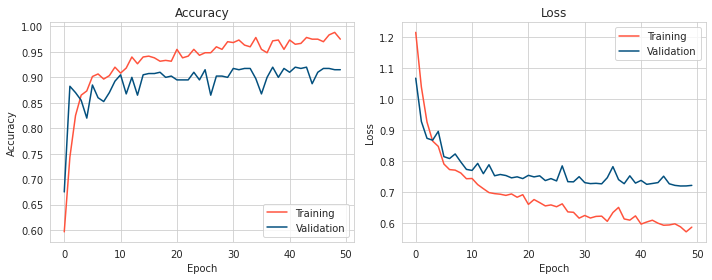

In [ ]:
plot_metrics(d1a_history1)
# print(d1a_history1.keys())

In [ ]:
ft_model, ft_history = finetune_binary_model()

Found 600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/50
75/75 [==============================] - 20s 264ms/step - loss: 1.2445 - accuracy: 0.5517 - val_loss: 1.1883 - val_accuracy: 0.5075
Epoch 2/50
75/75 [==============================] - 20s 261ms/step - loss: 1.1663 - accuracy: 0.5817 - val_loss: 1.1174 - val_accuracy: 0.7325
Epoch 3/50
75/75 [==============================] - 20s 260ms/step - loss: 1.1400 - accuracy: 0.6433 - val_loss: 1.0895 - val_accuracy: 0.7325
Epoch 4/50
75/75 [==============================] - 20s 261ms/step - loss: 1.1069 - accuracy: 0.7017 - val_loss: 1.0549 - val_accuracy: 0.8250
Epoch 5/50
75/75 [==============================] - 19s 259ms/step - loss: 1.0810 - accuracy: 0.7200 - val_loss: 1.1206 - val_accuracy: 0.5750
Epoch 6/50
75/75 [==============================] - 19s 259ms/step - loss: 1.0774 - accuracy: 0.7350 - val_loss: 1.0166 - val_accuracy: 0.8100
Epoch 7/50
75/75 [==============================] - 19s 258m

Best Model:
epoch: 48 , val_acc: 0.9049999713897705 , val_loss: 0.7362523078918457


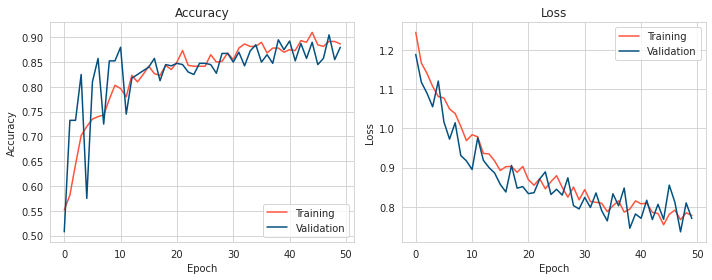

In [ ]:
plot_metrics(ft_history)

Best Model:
epoch: 48 , val_acc: 0.9049999713897705 , val_loss: 0.7362523078918457
validation_samples[0] :  200
validation_samples[1] :  200
Found 400 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67       200
           1       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400

Validating that damage exists...
[[0.4994137]]
Validation complete - proceed to location and severity determination
Validating that damage exists...
[[0.499347]]
Validation complete - proceed to location and severity determination
Found 400 images belonging to 2 classes.
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       200
           1       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



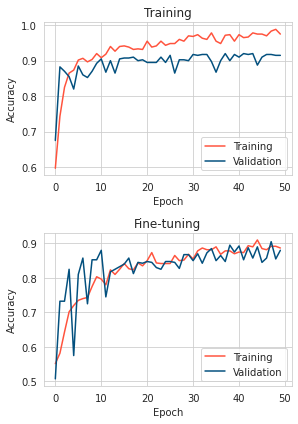

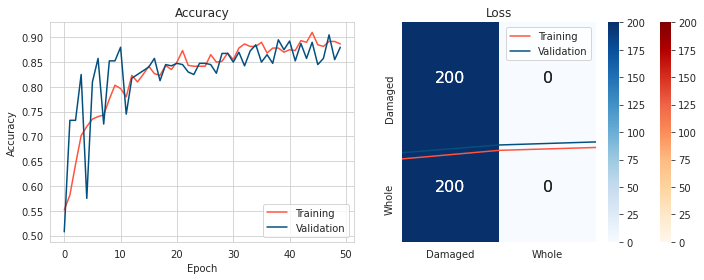

In [ ]:


# ## Load Model Point

# In[16]:


ft_model = load_model(location+'/ft_model.h5')


# In[5]:


with open(root_dir + 'data2/top_history.txt') as f:    
    top_history = json.load(f)


# In[6]:


with open(root_dir + 'data2/ft_history.txt') as f:    
    ft_history = json.load(f)


# In[12]:


def plot_metrics(hist, stop=50):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
                            
    axes = axes.flatten()

    axes[0].plot(range(stop), hist['accuracy'], label='Training', color='#FF533D')
    axes[0].plot(range(stop), hist['val_accuracy'], label='Validation', color='#03507E')
    axes[0].set_title('Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc='lower right')
                             
    axes[1].plot(range(stop), hist['loss'], label='Training', color='#FF533D')
    axes[1].plot(range(stop), hist['val_loss'], label='Validation', color='#03507E')
    axes[1].set_title('Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(loc='upper right')
                             
    plt.tight_layout();
    
    print("Best Model:") 
    print_best_model_results(hist)


# In[15]:


def plot_acc_metrics(hist1, hist2, stop=50):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4.25,6))
                            
    axes = axes.flatten()
    
    axes[0].plot(range(stop), hist1['accuracy'], label='Training', color='#FF533D')
    axes[0].plot(range(stop), hist1['val_accuracy'], label='Validation', color='#03507E')
    axes[0].set_title('Training')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc='lower right')
                             
    axes[1].plot(range(stop), hist2['accuracy'], label='Training', color='#FF533D')
    axes[1].plot(range(stop), hist2['val_accuracy'], label='Validation', color='#03507E')
    axes[1].set_title('Fine-tuning')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(loc='lower right')
                             
    plt.tight_layout();


# In[13]:


def evaluate_binary_model(model, directory, labels):
    datagen = ImageDataGenerator(rescale=1./255)
    batch_size = 8
    generator = datagen.flow_from_directory(directory,
                                target_size=(img_height, img_width),
                                batch_size=batch_size,
                                class_mode='binary', # categorical for multiclass
                                shuffle=False)
    steps_ev = len(labels)/batch_size
    # predictions = model.predict_generator(generator, len(labels))
    predictions = model.predict(generator, steps_ev)
    
    # use for multiclass
    # pred_labels = np.argmax(predictions, axis=1)
    
    pred_labels = [0 if i <0.5 else 1 for i in predictions]

    print(classification_report(validation_labels, pred_labels))
    cm = confusion_matrix(validation_labels, pred_labels)
    return cm 


# In[16]:


plot_acc_metrics(top_history, ft_history)


# In[22]:


# WINNER
plot_metrics(ft_history) # sgd with lr = 0.0001, sigmoid, with l2 = 0.001


# In[18]:

print("validation_samples[0] : ", validation_samples[0])
print("validation_samples[1] : ", validation_samples[1])
validation_labels = np.array([0] * validation_samples[0] + 
                             [1] * validation_samples[1])


# In[19]:


cm = evaluate_binary_model(ft_model, validation_data_dir, validation_labels)


# In[14]:


heatmap_labels = ['Damaged', 'Whole']


# In[27]:


sns.heatmap(cm, annot=True, annot_kws={"size": 16}, 
            fmt='g', cmap='OrRd', xticklabels=heatmap_labels, yticklabels=heatmap_labels);


# In[30]:


sns.heatmap(cm, annot=True, annot_kws={"size": 16}, 
            fmt='g', cmap='Blues', xticklabels=heatmap_labels, yticklabels=heatmap_labels);


# ## Making Live Predictions

# In[59]:


def car_categories_gate(image_path, model):
    urllib.request.urlretrieve(image_path, 'save.jpg') # or other way to upload image
    img = load_img('save.jpg', target_size=(256, 256)) # this is a PIL image 
    x = img_to_array(img) # this is a Numpy array with shape (3, 256, 256)
    x = x.reshape((1,) + x.shape)/255 # this is a Numpy array with shape (1, 3, 256, 256)
    pred = model.predict(x)
    print("Validating that damage exists...")
    print(pred)
    if pred[0][0] <=.5:

        print("Validation complete - proceed to location and severity determination")
    else:
        print("Are you sure that your car is damaged? Please submit another picture of the damage.")
        print("Hint: Try zooming in/out, using a different angle or different lighting")


# In[23]:


Image('https://www.nerdwallet.com/blog/wp-content/uploads/2015/12/exterior-car-damage-384x233.jpg')


# In[61]:


car_categories_gate('https://www.nerdwallet.com/blog/wp-content/uploads/2015/12/exterior-car-damage-384x233.jpg', ft_model)


# In[43]:


Image('http://1.bp.blogspot.com/-ToQS-qIxYbo/UDNuV5OcVQI/AAAAAAAABdo/tjeQywWiOo0/s200/Key+scratch.jpg')


# In[45]:


car_categories_gate('http://1.bp.blogspot.com/-ToQS-qIxYbo/UDNuV5OcVQI/AAAAAAAABdo/tjeQywWiOo0/s200/Key+scratch.jpg', ft_model)


# In[46]:


Image('https://www.carfax.com/media/zoo/images/rsz_frame-damage_85730e0a843d155e25e4b0f0e100bf65.jpg')


# In[60]:


# car_categories_gate('https://www.carfax.com/media/zoo/images/rsz_frame-damage_85730e0a843d155e25e4b0f0e100bf65.jpg', ft_model)


# ## Looking at edge cases

# In[14]:


def get_edge_cases(model, directory, exp_result):
    img_list = os.listdir(directory)
    edge_list = []
    for name in img_list:
        img = load_img(directory+name, target_size=(256, 256)) # this is a PIL image 
        x = img_to_array(img) # this is a Numpy array with shape (3, 256, 256)
        x = x.reshape((1,) + x.shape)/255 # this is a Numpy array with shape (1, 3, 256, 256)
        pred_prob = model.predict(x)
        if pred_prob <=0.5:
            pred = 0
        else:
            pred = 1
        if pred != exp_result:
            edge_list.append(name)
    return edge_list


# In[37]:


evaluate_binary_model(ft_model, validation_data_dir, validation_labels)
# TP = 221, TN = 194, FP = 36, FN = 9
# 9 were predicted to be damaged but were actually whole
# 36 were predicted to be whole but were actually damaged


# In[17]:


fp = get_edge_cases(ft_model, root_dir + 'data2/validation/00-damage/', 0)


# In[19]:


len(fp)


# In[ ]:


# view_images(root_dir + 'data2/validation/00-damage/', fp)  # damaged, identifed as whole


# In[73]:


fn = get_edge_cases(ft_model, root_dir + 'data2/validation/01-whole/', 1)


# In[76]:


# view_images(root_dir + 'data2/validation/01-whole/', fn) #whole, identified as damaged


(600, 13, 13, 512)
<class 'list'>
train_samples :  [300, 300]
train_samples[0] :  300
train_samples[1] :  300
validation_samples[0] :  200
validation_samples[1] :  200
train_data :  600
Epoch 1/50
17/19 [=========================>....] - ETA: 0s - loss: 1.2036 - accuracy: 0.5184
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to content/MyDrive/DeepLearningProject/data2/top_model_weights.h5
19/19 [==============================] - 1s 56ms/step - loss: 1.2036 - accuracy: 0.5183 - val_loss: 1.2037 - val_accuracy: 0.5000
Epoch 2/50
17/19 [=========================>....] - ETA: 0s - loss: 1.2037 - accuracy: 0.4779
Epoch 00002: val_accuracy improved from 0.50000 to 0.50250, saving model to content/MyDrive/DeepLearningProject/data2/top_model_weights.h5
19/19 [==============================] - 3s 145ms/step - loss: 1.2037 - accuracy: 0.4850 - val_loss: 1.2036 - val_accuracy: 0.5025
Epoch 3/50
17/19 [=========================>....] - ETA: 0s - loss: 1.2036 - accuracy: 0.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


Found 600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/50
19/18 [==============================] - ETA: 0s - loss: 1.2017 - accuracy: 0.5117
Epoch 00001: val_accuracy improved from -inf to 0.50750, saving model to content/MyDrive/DeepLearningProject/data2/ft_model.h5
19/18 [==============================] - 17s 919ms/step - loss: 1.2017 - accuracy: 0.5117 - val_loss: 1.2018 - val_accuracy: 0.5075
Epoch 2/50
19/18 [==============================] - ETA: 0s - loss: 1.2018 - accuracy: 0.4967
Epoch 00002: val_accuracy did not improve from 0.50750
19/18 [==============================] - 16s 867ms/step - loss: 1.2018 - accuracy: 0.4967 - val_loss: 1.2017 - val_accuracy: 0.5025
Epoch 3/50
19/18 [==============================] - ETA: 0s - loss: 1.2017 - accuracy: 0.5200
Epoch 00003: val_accuracy did not improve from 0.50750
19/18 [==============================] - 16s 841ms/step - loss: 1.2017 - accuracy: 0.5200 - val_loss: 1.2017 - val_accuracy: 0.5025
Epo

HTTPError: ignored

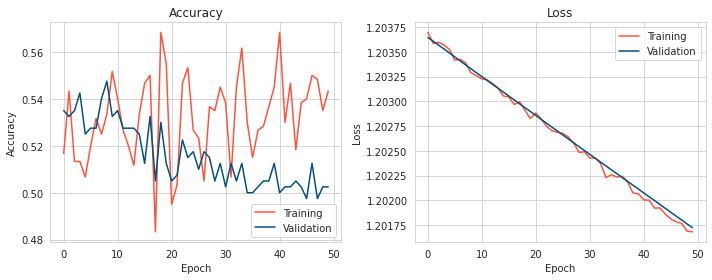

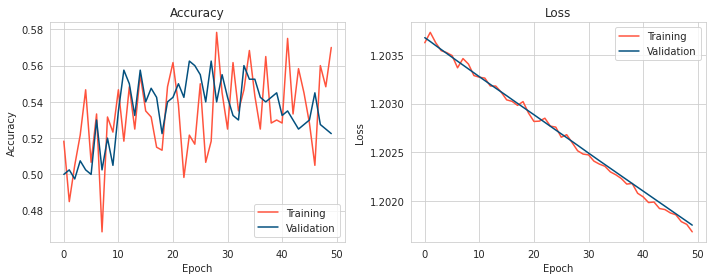

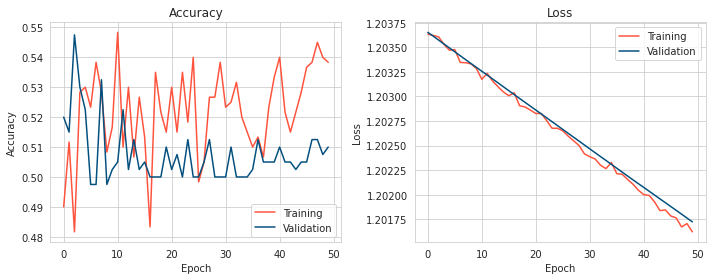

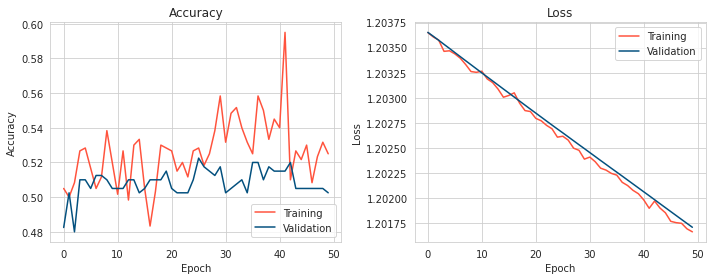

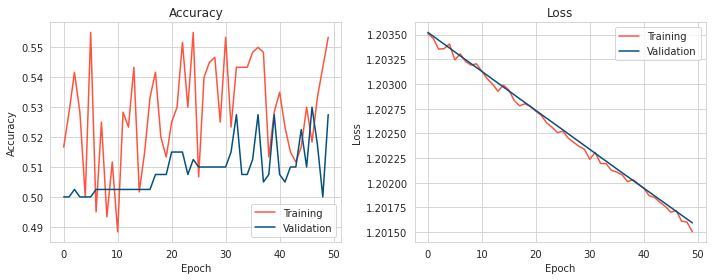

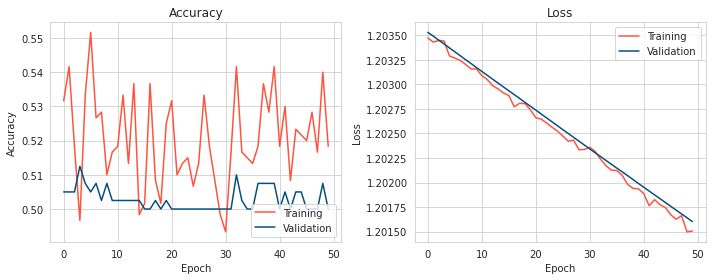

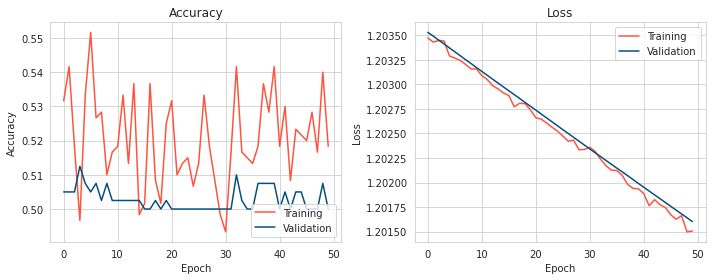

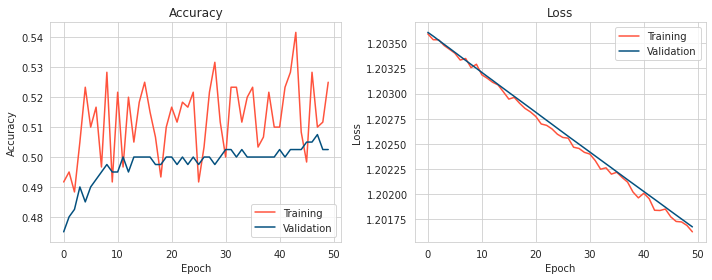

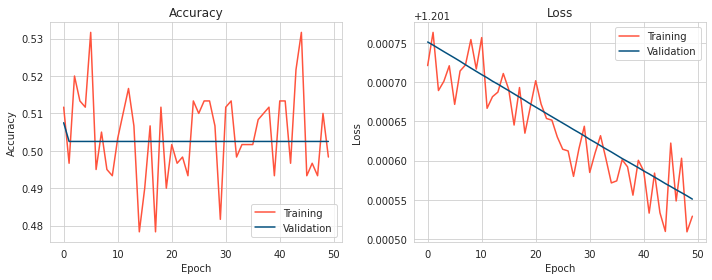

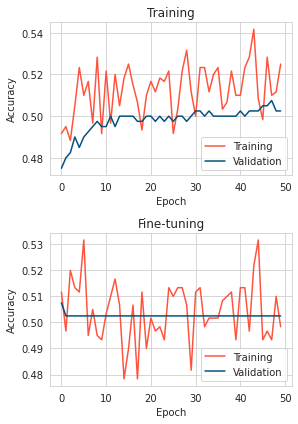

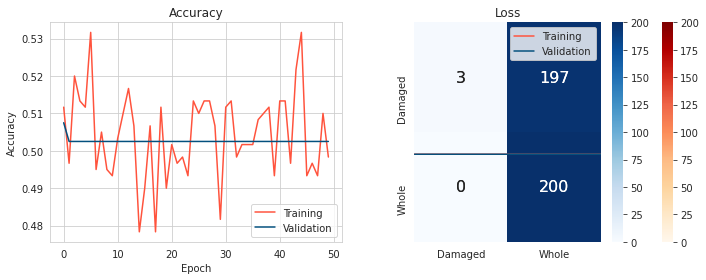

In [ ]:
 
# In[134]:


# d1a_model2, d1a_history2 = train_binary_model()


# # In[89]:


# d1a_model3, d1a_history3 = train_binary_model() 


# # In[96]:


# d1a_model4, d1a_history4 = train_binary_model() 


# # In[109]:


# d1a_model5, d1a_history5 = train_binary_model() 


# In[161]:


# d1a_model6, d1a_history6 = train_binary_model() 


# # In[155]:


# d1a_model7, d1a_history7 = train_binary_model()


# In[143]:


# plot_metrics(d1a_history1) # rmsprop, sigmoid, no regularization


# In[144]:


# plot_metrics(d1a_history2) # rmsprop, sigmoid, with l2 regularization (0.01)


# # In[145]:


# plot_metrics(d1a_history3) # rmsprop, sigmoid, with double dense and dropout layers


# # In[146]:


# plot_metrics(d1a_history4) # rmsprop, sigmoid, with aggresive dropout (.75)


# # In[147]:


# plot_metrics(d1a_history5) # rmsprop, sigmoid, with l2 = 0.001


# # In[160]:


# plot_metrics(d1a_history6) # sgd with lr = 0.0001, sigmoid, with l2 = 0.001


# In[165]:


# WINNER
# plot_metrics(d1a_history6) # sgd with lr = 0.0001, sigmoid, with l2 = 0.001


# # In[156]:


# plot_metrics(d1a_history7) # sgd with lr = 0.001 and decay 1e-6, sigmoid, with l2 = 0.001


# ## Fine Tuning

# In[175]:


# ft_model, ft_history = finetune_binary_model()


# In[180]:


# WINNER
